In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

In [196]:
df_earthquake = pd.read_csv('./datasets/database.csv')

In [197]:
df_earthquake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [198]:
print('There are {} rows and {} columns in the training dataset'.
      format(df_earthquake.shape[0],df_earthquake.shape[1]))

There are 23412 rows and 21 columns in the training dataset


In [199]:
df_earthquake.Type.value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [200]:
df_earthquake.Status.value_counts()

Reviewed     20773
Automatic     2639
Name: Status, dtype: int64

In [201]:
data_cols = ['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']

In [202]:
df_earthquake = df_earthquake[data_cols]

In [203]:
df_earthquake.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [204]:
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[0], df_earthquake.Date.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[1], df_earthquake.Time.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[2], df_earthquake.Latitude.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[3], df_earthquake.Longitude.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[4], df_earthquake.Depth.isna().sum()))
print('missing values of "{}" : {} cases '.format(df_earthquake.columns[5], df_earthquake.Magnitude.isna().sum()))

missing values of "Date" : 0 cases 
missing values of "Time" : 0 cases 
missing values of "Latitude" : 0 cases 
missing values of "Longitude" : 0 cases 
missing values of "Depth" : 0 cases 
missing values of "Magnitude" : 0 cases 


In [205]:
# missing hidden values
print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[0], len(df_earthquake[df_earthquake['Date'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[1], len(df_earthquake[df_earthquake['Time'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[2], len(df_earthquake[df_earthquake['Latitude'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[3], len(df_earthquake[df_earthquake['Longitude'] == 0])))

# it might be missing value. I am not the earthquake expert! :)
print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[4], len(df_earthquake[df_earthquake['Depth'] == 0])))

print('missing values of "{}" : {} cases '.
      format(df_earthquake.columns[5], len(df_earthquake[df_earthquake['Magnitude'] == 0])))


missing values of "Date" : 0 cases 
missing values of "Time" : 0 cases 
missing values of "Latitude" : 1 cases 
missing values of "Longitude" : 0 cases 
missing values of "Depth" : 170 cases 
missing values of "Magnitude" : 0 cases 


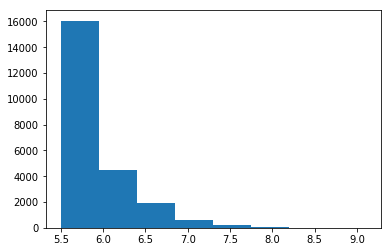

In [206]:
plt.hist(df_earthquake.Magnitude, bins=8)
plt.show()

In [207]:
# convert date and time into timestamp
timestamps = []

for cdate, ctime in zip(df_earthquake['Date'], df_earthquake['Time']):
    
    try:
        mydatetime = datetime.datetime.strptime(cdate + ' ' + ctime, '%m/%d/%Y %H:%M:%S')
        timestamps.append(time.mktime(mydatetime.timetuple()))
        
    except ValueError:
        timestamps.append('Error')
        print('Error')
        
timeStamps = pd.Series(timestamps)
df_earthquake['Timestamp'] = timeStamps.values

Error
Error
Error


In [210]:
# to get rid of the errors! we had 3 errors .. we could fix it though ..
error_indexs = df_earthquake[df_earthquake['Timestamp'] == 'Error'].index
df_earthquake.drop(error_indexs, inplace=True)

In [209]:
df_earthquake.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Timestamp
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,-1.57609e+08
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,-1.57444e+08
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,-1.57334e+08
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,-1.57072e+08
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,-1.57005e+08
